<img style="float: left; height:150px; padding-right: 50px" src="http://3.bp.blogspot.com/-DC7b1EkdbSU/TkxsKQbCQsI/AAAAAAAAAAY/YT3sDZTyKNQ/s1600/AAguy.jpg"/>
* Jon Madison  
* Created 11/17/2016
* [ufo data from Kaggle](https://www.kaggle.com/NUFORC/ufo-sightings)

# Reported UFO Sightings

**The data looked interesting to me, and it's always fun to speculate on UFOs, so i'm not sure what i want to find out from it. So let's take a look.**

In [186]:
import pandas as pd
import pandasql as pdsql
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()

In [187]:
ufo = pd.read_csv('./data/ufo/scrubbed.csv', low_memory=False)

There was a complete version, and a scrubbed version. I opted for the "scrubbed" version, which still isn't as scrubbed as much as i'll need it for my analysis, so here we go.

In [188]:
ufo.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [189]:
ufo.describe(include='all')

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
count,80332,80332,74535,70662,78400,80332,80332,80317,80332,80332,80332.000000
unique,69586,19900,67,5,29,537,8349,79997,317,18445,NaN
top,7/4/2010 22:00,seattle,ca,us,light,300,5 minutes,Fireball,12/12/2009,47.6063889,NaN
freq,36,525,9655,65114,16565,8635,4716,11,1510,581,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.772885
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.697205
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-176.658056
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-112.073333
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.903611
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-78.755000


Oh...

In [190]:
ufo_count = len(ufo)
ufo_count

80332

In [191]:
ufo.loc[:3]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833


** Cleanup time. Start by looking at the NaNs. Are there enough in significant areas to deal with? **

In [192]:
for col in ufo.columns:
    if ufo[col].hasnans:
        print(col)

state
country
shape
comments


Has nans. How big is the problem?

In [8]:
def calcnan(col):
    if ufo[col].hasnans:
        percent_null = (sum(pd.isnull(ufo[col])) / ufo_count) * 100
        print(col, str(percent_null) + "% NaN")
        return percent_null
          
l = list(map(lambda col: calcnan(col), ufo.columns))
sum(filter(None, l))

state 7.21630234527% NaN
country 12.0375441916% NaN
shape 2.40501917044% NaN
comments 0.0186725090873% NaN


21.677538216401935

21% of our records have this problem. sigh. I can't just use an ax (aka hasnans)

In [9]:
df = pdsql.sqldf("SELECT * from ufo WHERE country is null and state is not null")
len(df)

6414

Well here's low hanging fruit -- get the country right on the records by looking at the state, at least for US states...

In [10]:
west = ["WY","WA","UT","OR","NM","NV","MT","ID","HI","CO","CA","AZ","AK"]
south = ["WV","VA","TX","TN","SC","OK","NC","MS","MD","LA","KY","GA","FL","DE","AR","AL"]
northeast = ["VT","RI","PA","NY","NJ","NH","MA","ME","CT"]
midwest = ["WI","SD","OH","ND","NE","MO","MN","MI","KS","IA","IN","IL"]

In [219]:
us_states = (np.append(np.append(northeast, midwest), np.append(west, south)))

In [221]:
us_states

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], 
      dtype='<U2')

In [224]:
us_states = [ 'ak','al', 'ar','az','ca','co','ct','de','fl','ga','hi','id','il','in','ia','ks','ky','la','me','md','ma','mi','mn','ms','mo','mt','ne','nv','nh','nj','nm','ny','nc','nd','oh','ok','or','pa','ri','sc','sd','tn','tx','ut','vt','va','wa','wv','wi','wy' ]

In [225]:
def set_region_from_state(row):
    #print("state", row.state)
    if type(row.state) is not str:
        return "none"
    elif row.state.strip().upper() in west:
        #print("got a US state", row.state)
        return "west"
    elif row.state.strip().upper() in south:
        #print("got a US state", row.state)
        return "south"
    elif row.state.strip().upper() in northeast:
        #print("got a US state", row.state)
        return "northeast"
    elif row.state.strip().upper() in midwest:
        #print("got a US state", row.state)
        return "midwest"
    else:
        return "none"       

In [226]:
def set_country_from_state(row):
    #print("state", row.state)
    if type(row.state) is not str:
        return row.country
    elif row.state.strip().upper() in west:
        #print("got a US state", row.state)
        return "us"
    elif row.state.strip().upper() in south:
        #print("got a US state", row.state)
        return "us"
    elif row.state.strip().upper() in northeast:
        #print("got a US state", row.state)
        return "us"
    elif row.state.strip().upper() in midwest:
        #print("got a US state", row.state)
        return "us"
    else:
        return row.country        

let's try one...

In [227]:
set_country_from_state(df.loc[2])

'us'

This looks good, let's run it on the dataset:

In [228]:
range(len(ufo))

range(0, 80332)

In [229]:
ufo['country'] = [set_country_from_state(ufo.loc[i]) for i in range(len(ufo))]

In [230]:
ufo['region'] = [set_region_from_state(ufo.loc[i]) for i in range(len(ufo))]

How'd it do?

In [231]:
ufo[:3]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,region
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,south
1,10/10/1949 21:00,lackland afb,tx,us,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,south
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,none


In [232]:
len(ufo)

80332

Good enough for now, i must move on to the next...

### Things I'd like to find out:
* Year with the most sightings
* Locale with most sightings (state? region?)
* Probability that sighting was reported in the us

### Things I'd like to predict:
* Are people in smaller cities more likely to sight UFO's?
* Are there times that people are more likely report when they have seen UFOs?

### General:
* Do some unsupervised learning to discover clusters

So, to begin, if i want to work with the date and times, i'll have to do some parsing out. praying that the datetime field is consistent...

In [233]:
type(ufo.datetime[0])

str

It's a string, yep, so let me try to run a converter, and add a column that separates the time from the date of the sighting.

In [234]:
date_ex = ufo.datetime[0]
print("converting", date_ex)
pd.datetime.strptime(date_ex, '%d/%m/%Y %H:%M')


converting 10/10/1949 20:30


datetime.datetime(1949, 10, 10, 20, 30)

well...tried to convert all:

ufo['datetime'] = pd.to_datetime(ufo['datetime'], format='%d/%m/%Y %H:%M')

turns out that some of the times are 24:nn --how many of these are there? T.T

In [235]:
pdsql.sqldf("SELECT datetime from ufo WHERE datetime like '%24:%'").size

694

ugh. i have a mind to just nix them but, sigh, let's convert to string

In [236]:
def convert24(date_str):
    #print (convert24, date_str)
    import re
    match=re.search(r'^(\d{1,2}\/\d{1,2}\/\d{4})\ (\d{2}):(\d{2})', date_str)
    if match:
        if(match.group(2) == "24"):
            output = match.group(1)+' 00:'+match.group(3)
        else:
            output = date_str
        return output
    else:
        return ""

In [237]:
convert24('10/18/1949 24:40')

'10/18/1949 00:40'

In [238]:
convert24('10/18/1949 13:40')

'10/18/1949 13:40'

In [239]:
def set_hour_from_datetime(row):
    if type(row.datetime) is str:
        d = convert24(row.datetime)
        #print(row.datetime, "->", d)
        d = pd.datetime.strptime(d,'%m/%d/%Y %H:%M')
        #print("got ", d.hour, "from", row.datetime)
        return d.hour
    else:
        return 0

In [240]:
def set_year_from_datetime(row):
    if type(row.datetime) is str:
        d = convert24(row.datetime)
        #print(row.datetime, "->", d)
        d = pd.datetime.strptime(d,'%m/%d/%Y %H:%M')
        #print("got ", d.hour, "from", row.datetime)
        return d.year
    else:
        return 0

In [241]:
ufo["hour"] = [set_hour_from_datetime(ufo.loc[i]) for i in range(len(ufo))]
ufo["year"] = [set_year_from_datetime(ufo.loc[i]) for i in range(len(ufo))]

**At this point, there's probably more cleanup, but i need to spend time analyzing data.**

## Sightings over the years

In [242]:
ufo = ufo.sort_values(['year'], ascending=True )

In [243]:
len(ufo[ufo["year"] == 1949])

16

In [244]:
sighting_year = ufo.year.unique()
sighting_count = [len(ufo[ufo["year"] == year]) for year in ufo.year.unique()]

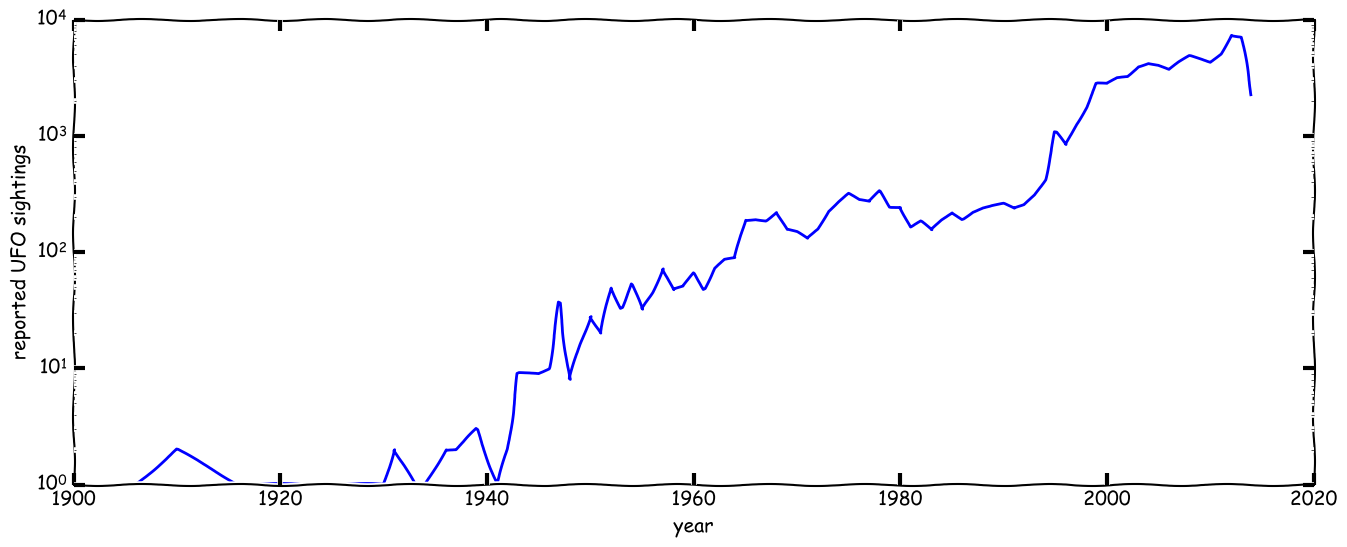

In [245]:
plt.figure(figsize=(16,6))
plt.plot(sighting_year,sighting_count)
plt.xlabel("year")
plt.ylabel("reported UFO sightings")
plt.yscale('log')
plt.show()

In [246]:
most_sightings = sighting_year[np.argmax(sighting_count)]

In [247]:
print(str(most_sightings), "was the year with the most reported UFO sightings")

2012 was the year with the most reported UFO sightings


### Probability that a sighting was in the U.S.

In [248]:
us_sightings = ufo[ufo["country"] == 'us']

In [249]:
len(us_sightings) / len(ufo)

0.88181546581686

In [250]:
#limit analyses to US:
ufo = ufo[ufo["country"] == "us"]

In [251]:
sighting_year = ufo.year.unique()
sighting_count = [len(ufo[ufo["year"] == year]) for year in ufo.year.unique()]

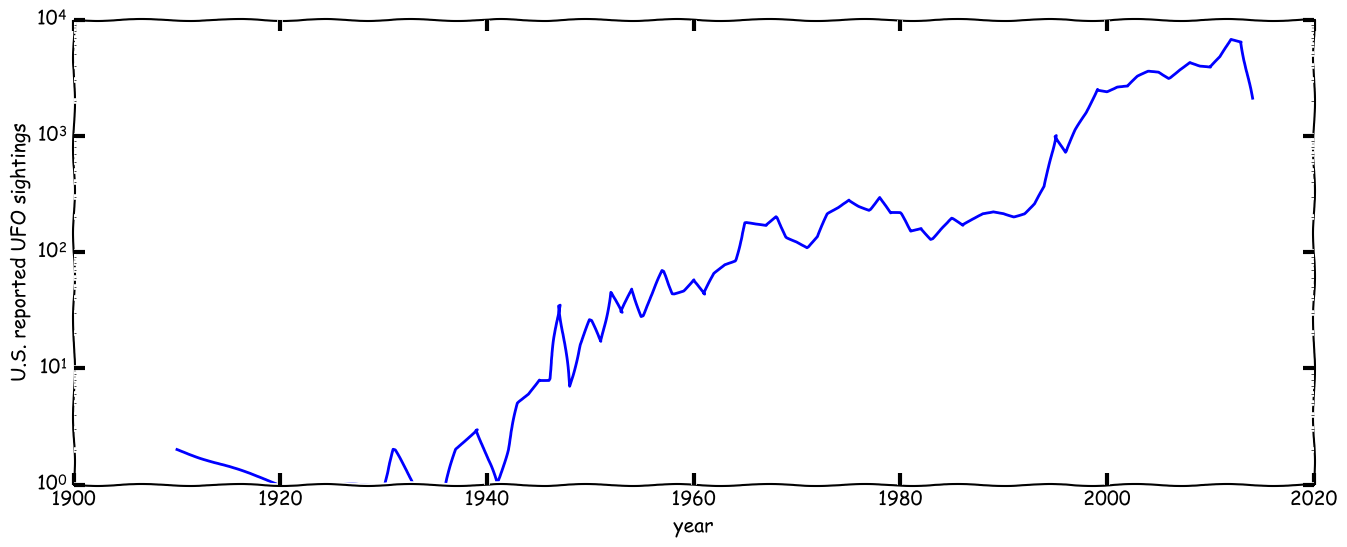

In [252]:
plt.figure(figsize=(16,6))
plt.plot(sighting_year,sighting_count)
plt.xlabel("year")
plt.ylabel("U.S. reported UFO sightings")
plt.yscale('log')
plt.show()

**This is kinda linear...let's fit a line to it. :)**

In [253]:
from sklearn.linear_model import LinearRegression

In [254]:
regress = LinearRegression()

In [255]:
regress.fit(sighting_year.reshape(-1,1), sighting_count)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [256]:
slope = regress.coef_[0]
intercept = regress.intercept_
print(slope, intercept)

40.8890221878 -79770.4196326


In [257]:
sighting_year[10:-2]

array([1939, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012])

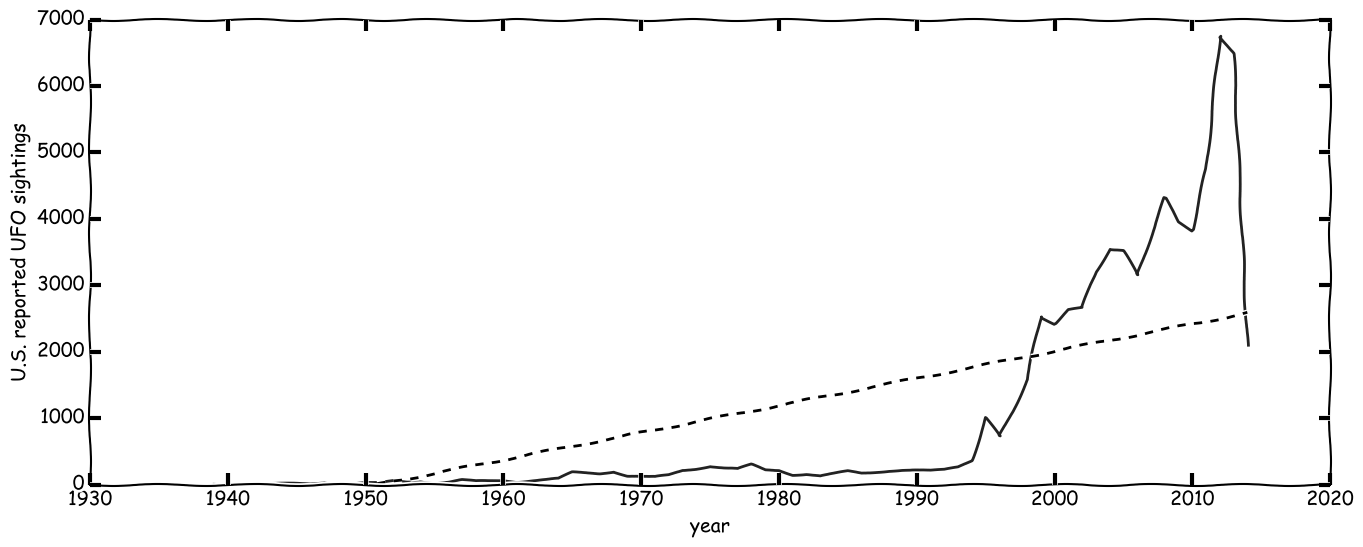

In [258]:
plt.figure(figsize=(16,6))
plt.plot(sighting_year[10:],sighting_count[10:], color="#222222")
plt.xlabel("year")
plt.ylabel("U.S. reported UFO sightings")
plt.ylim(0)
plt.plot(sighting_year[10:],
         regress.predict(sighting_year[10:].reshape(-1, 1)),
         color="black", linestyle="--")
plt.show()

### Sighting count by state

In [259]:
state_counts = [len(ufo[ufo["state"] == state]) for state in us_states]

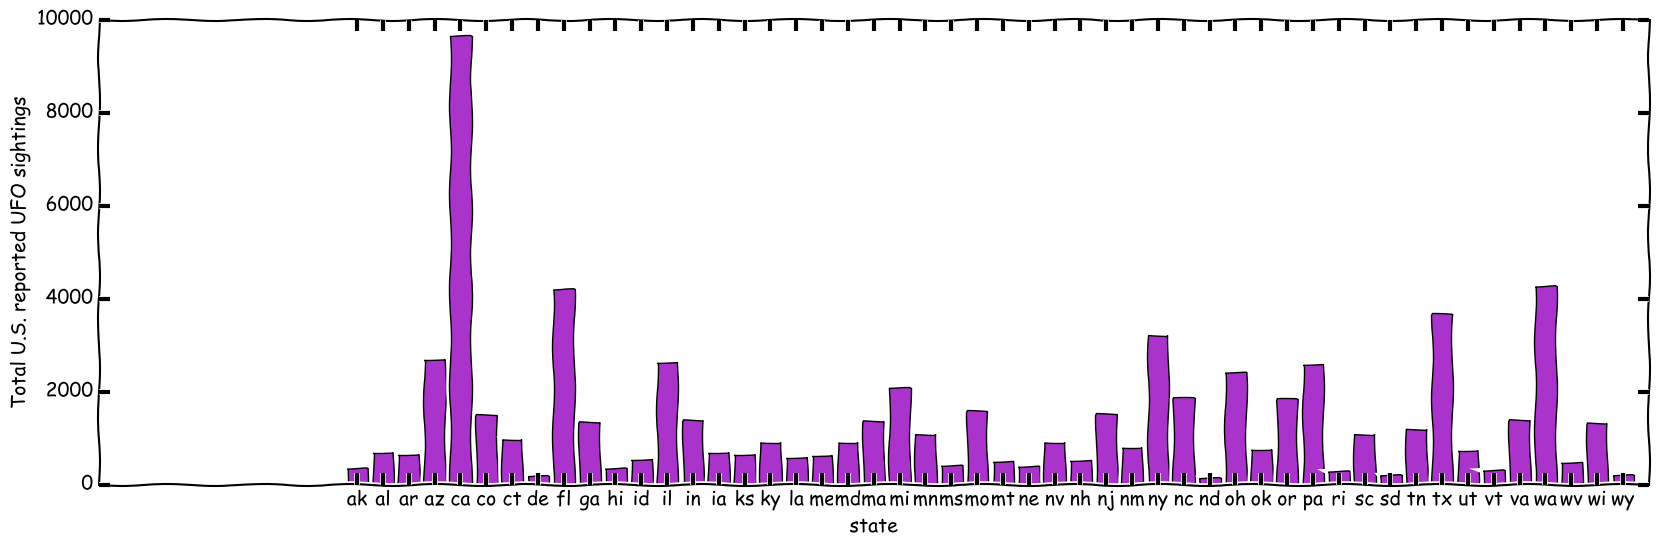

In [260]:
plt.figure(figsize=(20,6))
plt.bar(range(len(us_states)), state_counts, align='center', color="#aa33cc")
plt.xlabel("state")
plt.ylabel("Total U.S. reported UFO sightings")
plt.xticks(range(len(us_states)), us_states)
plt.show()

(i have no clue yet why my graph starts so far to the right...)

### Sightings by region

In [262]:
ufo.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude ', 'region', 'hour', 'year'],
      dtype='object')

In [263]:
regions = ufo.region.unique()
regions

array(['south', 'midwest', 'west', 'northeast', 'none'], dtype=object)

In [264]:
region_count = [len(ufo[ufo["region"] == region]) for region in regions]
region_count

[20385, 14616, 24401, 11404, 32]

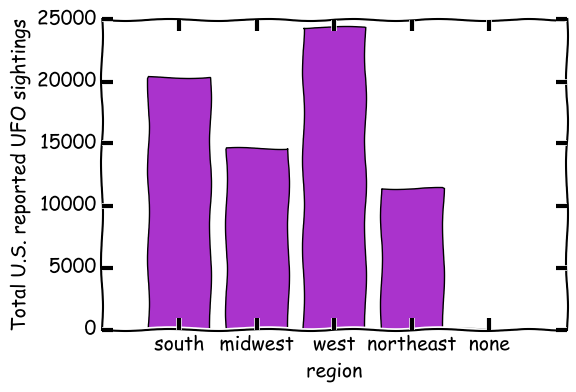

In [265]:
plt.bar(range(len(regions)), region_count, align='center', color="#aa33cc")
plt.xlabel("region")
plt.ylabel("Total U.S. reported UFO sightings")
plt.xticks(range(len(regions)), regions)
plt.show()

## Classify by region...

In [266]:
class0 = ufo[ufo["region"] == regions[0]]
class1= ufo[ufo["region"] == regions[1]]
class2 = ufo[ufo["region"] == regions[2]]
class3 = ufo[ufo["region"] == regions[3]]

In [267]:
from sklearn.preprocessing import MinMaxScaler

In [268]:
scaler = MinMaxScaler()

In [269]:
from sklearn.neighbors import KNeighborsClassifier

In [270]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=4)

In [271]:
ufo[:3]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,region,hour,year
46858,6/1/1910 15:00,wills point,tx,us,cigar,120,2 minutes,Cigar shaped object moving from West to East,4/16/2005,32.7091667,-96.008056,south,15,1910
10580,1/1/1910 24:00,kirksville (near),mo,us,disk,120,minutes,Historical sighting (1903 - 1913) Northern Mis...,9/15/2005,40.1947222,-92.583056,midwest,0,1910
46694,6/11/1920 21:00,cicero,in,us,unknown,60,1 minute,((NUFORC Note: Probable hoax. Note date. PD...,5/12/2009,40.1238889,-86.013333,midwest,21,1920


** Create a fit between hour and number of sightings, to use for future predictions...**

In [272]:
hours = ufo["hour"].unique()
hours_counts = [[hour, len(ufo[ufo["hour"] == hour])] for hour in hours]

In [273]:
hours_counts

[[15, 1254],
 [0, 3989],
 [21, 10396],
 [18, 3583],
 [14, 1146],
 [22, 9519],
 [13, 1133],
 [19, 5495],
 [17, 2313],
 [20, 7832],
 [2, 2013],
 [1, 2759],
 [23, 6749],
 [11, 997],
 [10, 1057],
 [12, 1198],
 [7, 793],
 [16, 1405],
 [6, 1090],
 [8, 713],
 [4, 1338],
 [3, 1733],
 [9, 872],
 [5, 1461]]